# Data Analysis on Electric Vehicle


Task 1: Data Preparation

Load Data: Import the dataset. 
Fix Column Names: Standardize column names.
Format Data Types: Convert columns to appropriate data types.
Handle Missing Values: Impute missing values using:
Mean for normal distributions.
Median for skewed distributions.
Mode for categorical data.

In [1]:
import pandas as pd
import plotly.express as pxa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bar_chart_race as bcr
from IPython.display import Image, display
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv("dataset - dataset.csv")
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [3]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(" ", "_")


In [5]:
df.columns = df.columns.str.strip().str.lower()

In [6]:
df.head()

vin_(1-10)     county      city state  postal_code  model_year       make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        model                   electric_vehicle_type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  clean_alternative_fuel_vehicle_(cafv)_eligibility  electric_range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   base_msrp  legislative_district  dol_vehicle_id  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              vehicle_location        electric_utility  2020_census_tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [7]:
df.shape

(112634, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         112634 non-null  object 
 1   county                                             112634 non-null  object 
 2   city                                               112634 non-null  object 
 3   state                                              112634 non-null  object 
 4   postal_code                                        112634 non-null  int64  
 5   model_year                                         112634 non-null  int64  
 6   make                                               112634 non-null  object 
 7   model                                              112614 non-null  object 
 8   electric_vehicle_type                              112634 non-null  object

In [9]:
#checking Missinh values
df.isnull().sum()

vin_(1-10)                                             0
county                                                 0
city                                                   0
state                                                  0
postal_code                                            0
model_year                                             0
make                                                   0
model                                                 20
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         0
base_msrp                                              0
legislative_district                                 286
dol_vehicle_id                                         0
vehicle_location                                      24
electric_utility                                     443
2020_census_tract                                      0
dtype: int64

In [10]:
df.model.value_counts().reset_index().head()

model  count
0  MODEL 3  23135
1  MODEL Y  17142
2     LEAF  12880
3  MODEL S   7377
4  BOLT EV   4910

In [11]:
df.legislative_district.value_counts()[:3].reset_index().head()

legislative_district  count
0                  41.0   7605
1                  45.0   7112
2                  48.0   6462
3                  36.0   5251
4                  46.0   4723

In [12]:
df.vehicle_location.value_counts().reset_index().head()

vehicle_location  count
0  POINT (-122.13158 47.67858)   2916
1   POINT (-122.2066 47.67887)   2059
2   POINT (-122.1872 47.61001)   2001
3  POINT (-122.31765 47.70013)   1880
4  POINT (-122.12096 47.55584)   1852

In [13]:
df.electric_utility.value_counts().reset_index().head()

electric_utility  count
0      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  40247
1                             PUGET SOUND ENERGY INC  22172
2       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  21447
3  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...   6522
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...   5053

In [14]:
# Handle Missing Values: Impute missing values using
df.model = df.model.fillna(df.model.mode()[0])
df.legislative_district = df.legislative_district.fillna(df.legislative_district.mean())
df.vehicle_location = df.vehicle_location.fillna(df.vehicle_location.mode()[0])
df.electric_utility = df.electric_utility.fillna(df.electric_utility.mode()[0])

In [15]:
df.isnull().sum()

vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
postal_code                                          0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
2020_census_tract                                    0
dtype: int64

In [16]:
pd.options.display.float_format = '{:.0f}'.format
df.describe().transpose()

count        mean        std        min         25%  \
postal_code          112634       98156       2649       1730       98052   
model_year           112634        2019          3       1997        2017   
electric_range       112634          88        102          0           0   
base_msrp            112634        1793      10784          0           0   
legislative_district 112634          30         15          1          18   
dol_vehicle_id       112634   199456680   93984270       4777   148414150   
2020_census_tract    112634 52966495754 1699104500 1101001400 53033008500   

                             50%         75%         max  
postal_code                98119       98370       99701  
model_year                  2020        2022        2023  
electric_range                32         208         337  
base_msrp                      0           0      845000  
legislative_district          34          43          49  
dol_vehicle_id         192389624   219189880   479254772  
2020_census_tract    53033029305 53053072506 56033000100

# Univariate Analysis

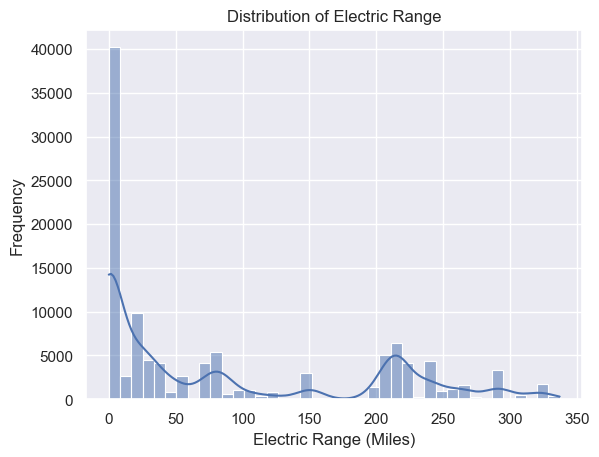

In [17]:
sns.histplot(x = df.electric_range, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Frequency')
plt.show()

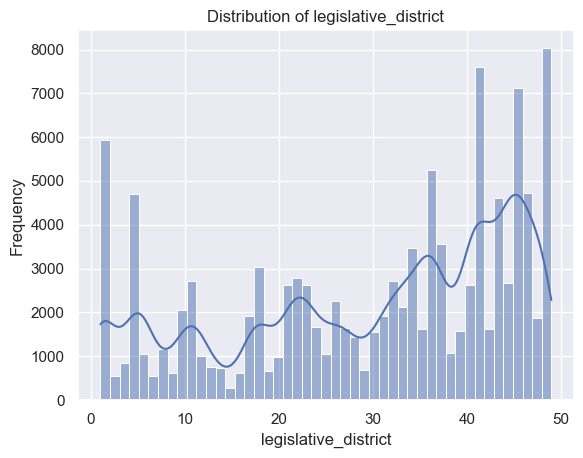

In [18]:
sns.histplot(x = df.legislative_district, kde = True)
plt.title('Distribution of legislative_district')
plt.xlabel('legislative_district')
plt.ylabel('Frequency')
plt.show()

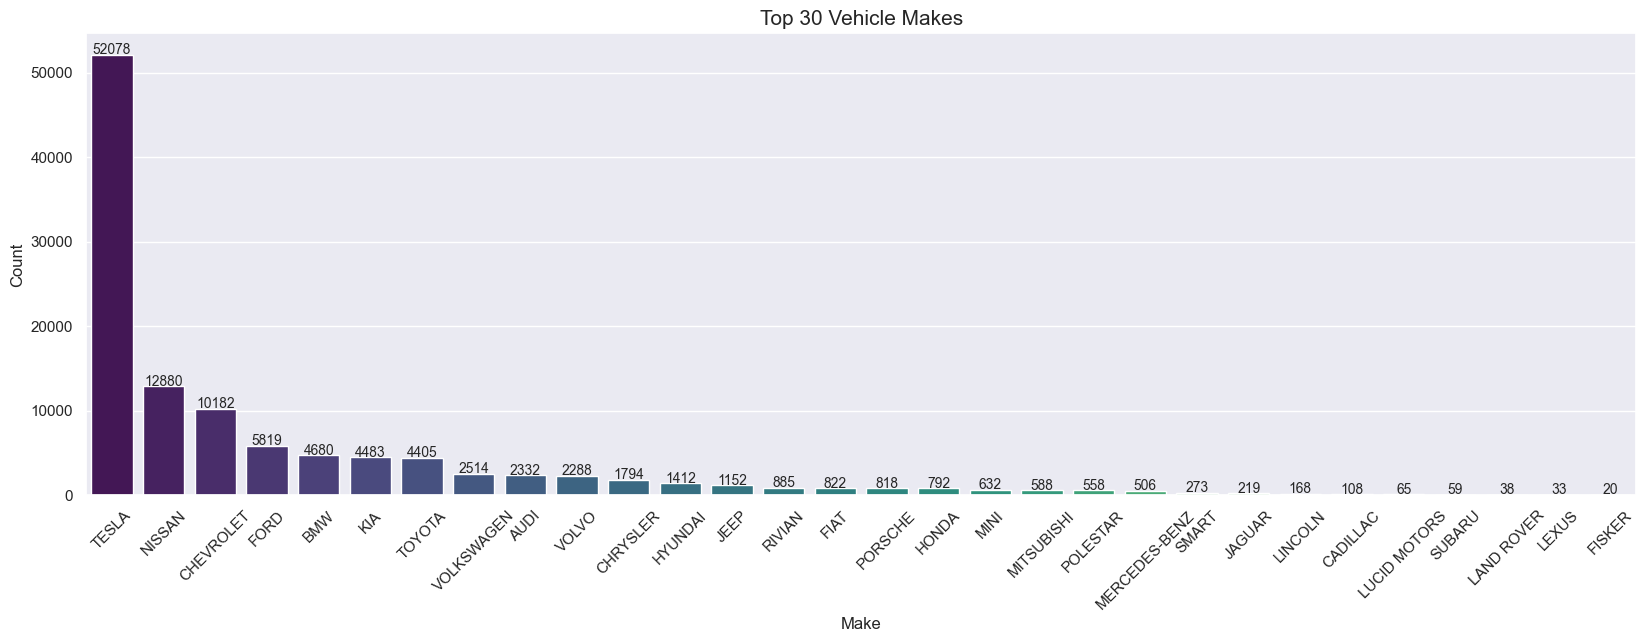

In [19]:
plt.figure(figsize=(20,6))
top_makes = df['make'].value_counts().nlargest(30)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')

# Adding data labels on top of bars
for index, value in enumerate(top_makes.values):
    plt.text(index, value + 100, str(value), ha='center', fontsize=10)

plt.title('Top 30 Vehicle Makes', fontsize=15)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()


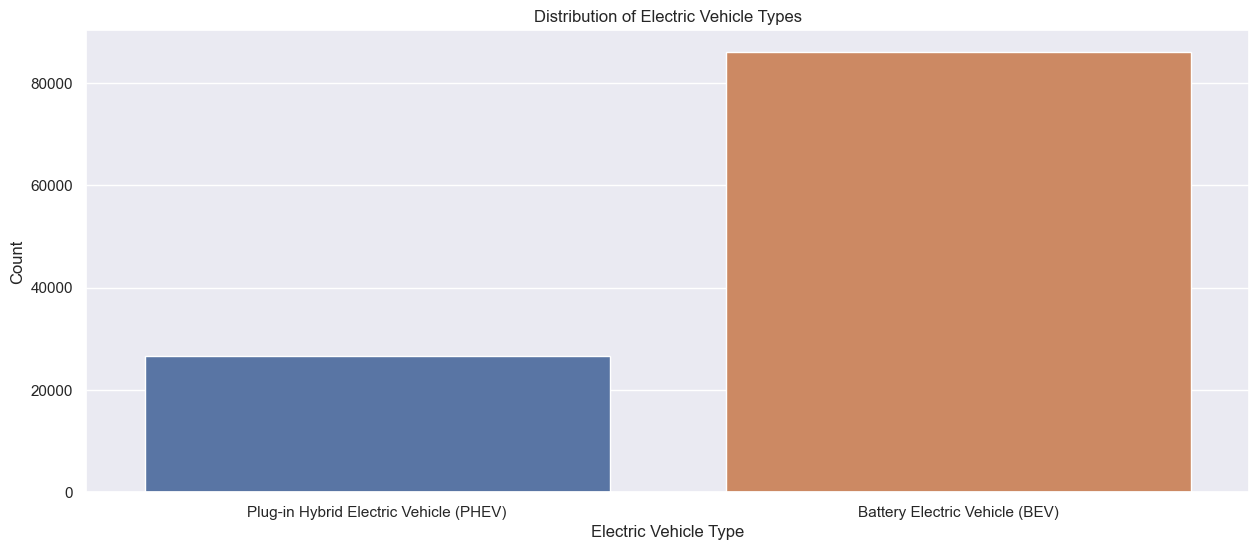

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x='electric_vehicle_type', data=df)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.show()

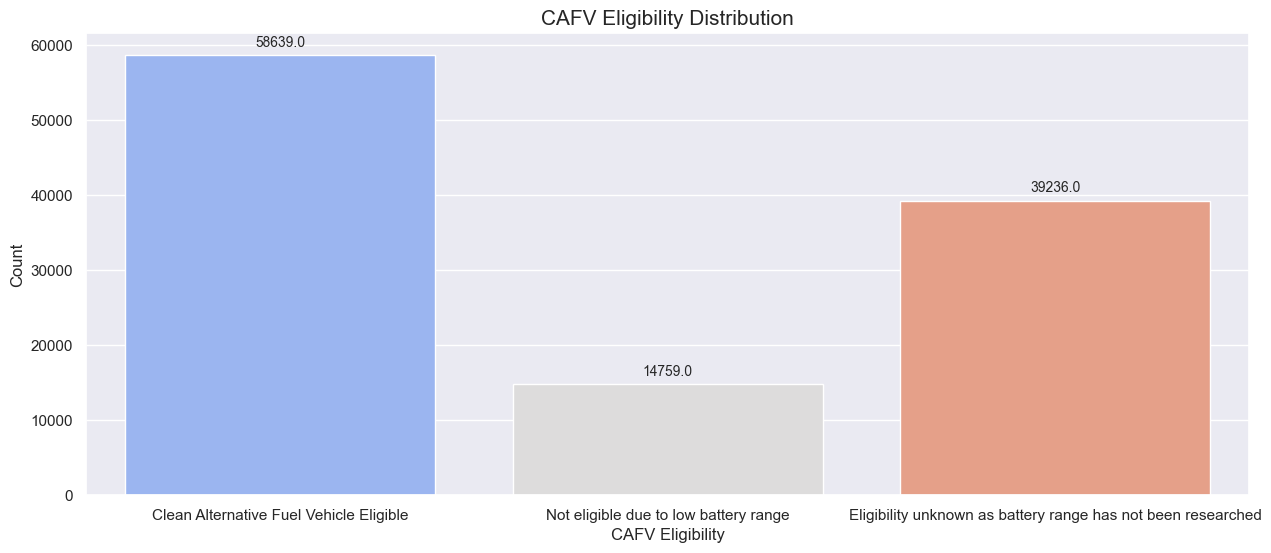

In [21]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x='clean_alternative_fuel_vehicle_(cafv)_eligibility', data=df, palette='coolwarm')

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

plt.title('CAFV Eligibility Distribution', fontsize=15)
plt.xlabel('CAFV Eligibility', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


# Bivariate Analysis:

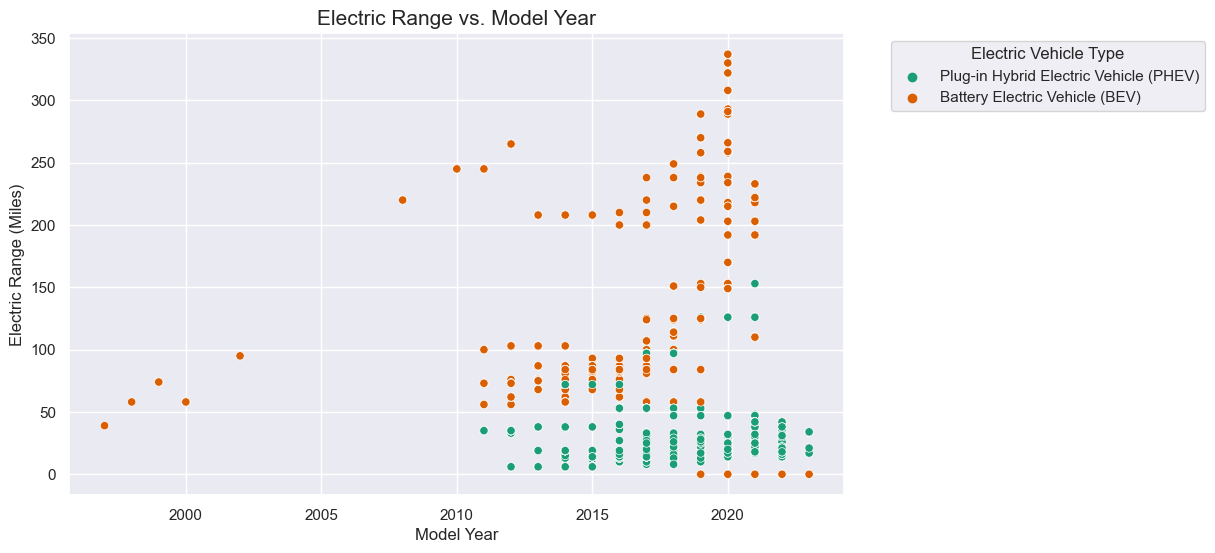

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='model_year', y='electric_range', data=df, hue='electric_vehicle_type', palette='Dark2')
plt.title('Electric Range vs. Model Year', fontsize=15)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Electric Range (Miles)', fontsize=12)
plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1) Bivariate Analysis: Electric Range vs. Model Year
🔋📅 Key Observations:

Trend Over Time: Both PHEVs and BEVs show an increasing electric range from 2000 to 2020.
Comparison: BEVs generally have higher ranges than PHEVs.
Data Points: Orange dots represent PHEVs, while green dots represent BEVs.

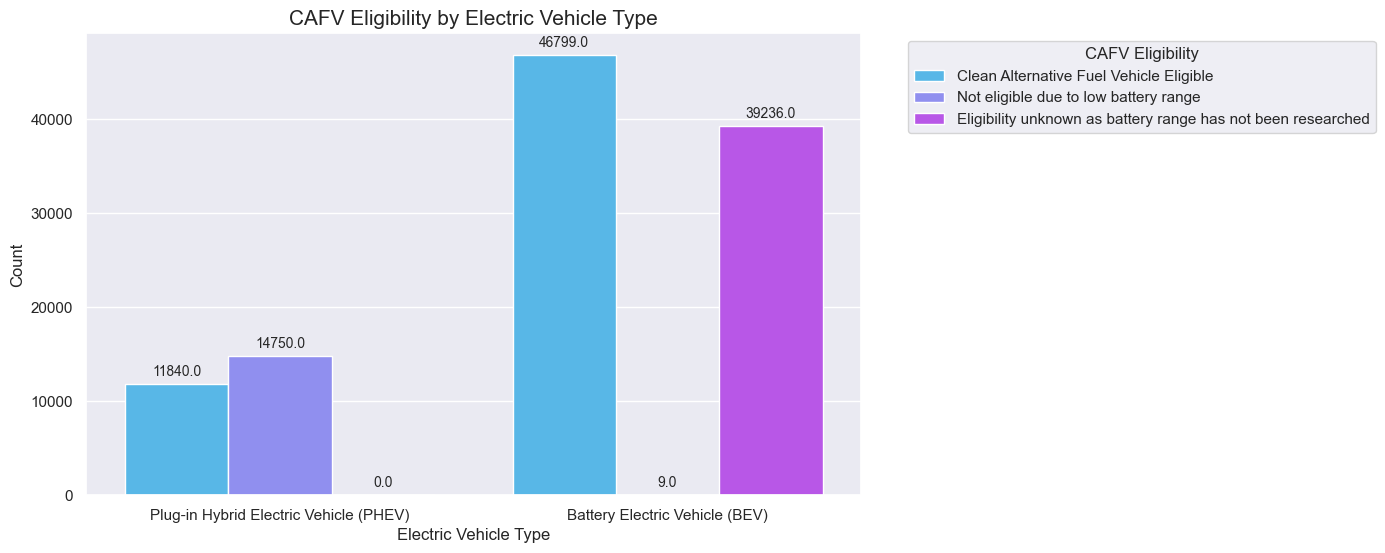

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='electric_vehicle_type', hue='clean_alternative_fuel_vehicle_(cafv)_eligibility', data=df, palette='cool')

# Adding data labelsb
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

plt.title('CAFV Eligibility by Electric Vehicle Type', fontsize=15)
plt.xlabel('Electric Vehicle Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='CAFV Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


2) Electric Vehicle Types & CAFV Eligibility
🚗📊 Key Observations:

Vehicle Types: Includes PHEV, BEV, and BEVx.
CAFV Eligibility:
Light Blue = Not eligible.
Purple = Eligible.
BEVs have the most eligible vehicles for rebates, showing strong qualification compared to PHEVs and BEVx.

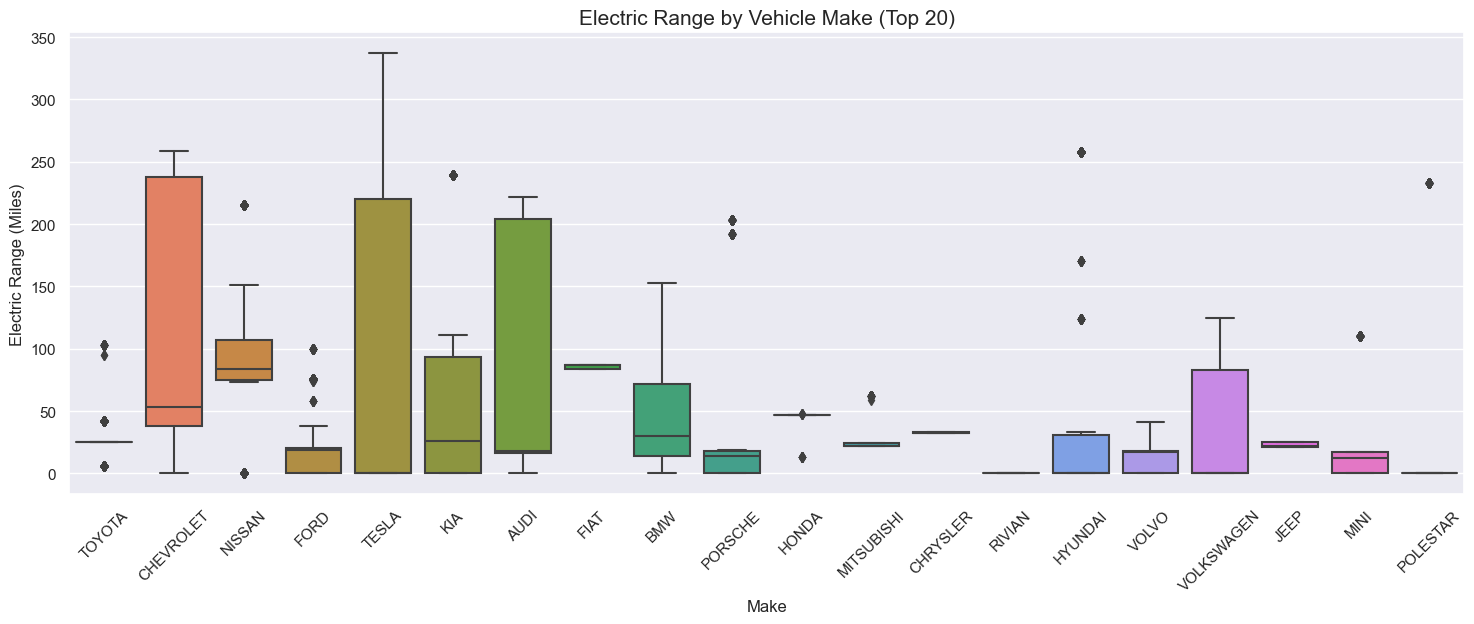

In [24]:
plt.figure(figsize=(18,6))
top_makes = df['make'].value_counts().nlargest(20).index
ax = sns.boxplot(x='make', y='electric_range', data=df[df['make'].isin(top_makes)], palette='husl')

plt.title('Electric Range by Vehicle Make (Top 20)', fontsize=15)
plt.xlabel('Make', fontsize=12)
plt.ylabel('Electric Range (Miles)', fontsize=12)
plt.xticks(rotation=45)

# Add median data labels on top of boxes
for i, box in enumerate(ax.artists):
    y = box.get_ydata()
    median = round(data[data['make'] == top_makes[i]]['electric_range'].median(), 2)
    plt.text(i, median + 10, f'{median}', ha='center', fontsize=10)

plt.show()


3) Electric Range by Vehicle Make (Top 20)
🔧📈 Key Observations:

Top 20 Vehicle Makes: Boxplots show the spread of electric ranges for the most frequent makes.
Range Distribution: Each boxplot shows the median, quartiles, and outliers for different vehicle brands, helping compare range consistency and performance.

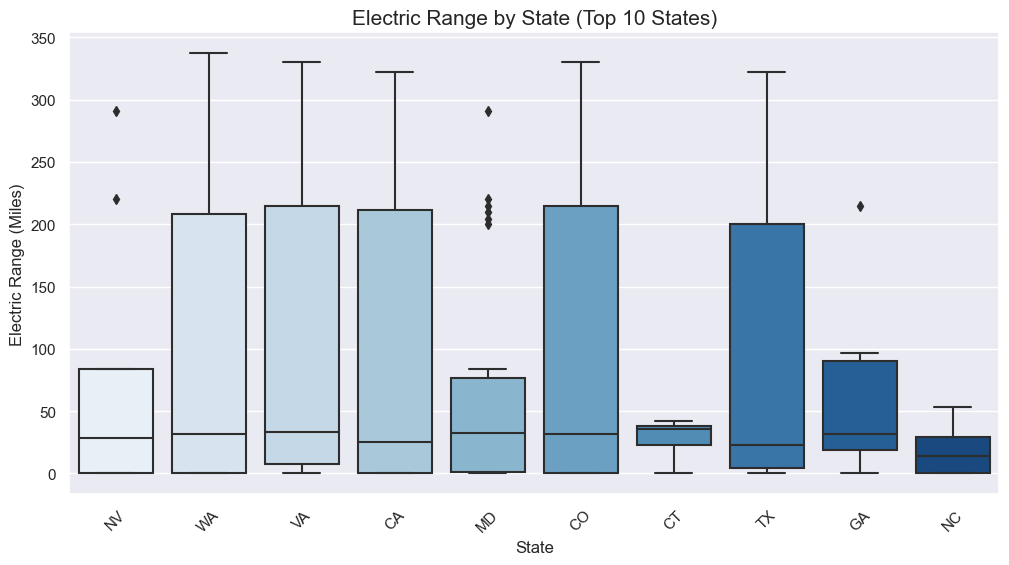

In [25]:
plt.figure(figsize=(12,6))
top_states = df['state'].value_counts().nlargest(10).index
ax = sns.boxplot(x='state', y='electric_range', data=df[df['state'].isin(top_states)], palette='Blues')

plt.title('Electric Range by State (Top 10 States)', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Electric Range (Miles)', fontsize=12)
plt.xticks(rotation=45)

# Add median data labels on top of boxes
for i, box in enumerate(ax.artists):
    y = box.get_ydata()
    median = round(df[df['state'] == top_states[i]]['electric_range'].median(), 2)
    plt.text(i, median + 10, f'{median}', ha='center', fontsize=10)

plt.show()


4) Electric Range by State (Top 10 States)
🌍🔋 Key Observations:

Top 10 States: Boxplots display electric range distributions across states.
Details: The middle line shows average range, with whiskers indicating most vehicles' range, and dots representing outliers.
This helps compare vehicle performance across states.

# Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [26]:
import pandas as pd
import plotly.express as px

# Sample Data (replace with your actual dataframe)
# df = pd.read_csv('your_data.csv')

# Group data by 'state' and count the number of electric vehicles per state
ev_count_by_state = df.groupby('state').size().reset_index(name='ev_count')

# Create the Choropleth map
fig = px.choropleth(
    ev_count_by_state,
    locations='state',  # Column representing state code (like 'WA', 'FL', etc.)
    locationmode="USA-states",  # This maps 'state' to U.S. states
    color='ev_count',  # Color by the count of electric vehicles
    color_continuous_scale='Blues',  # Color scale
    scope="usa",  # Restrict map to the USA
    labels={'ev_count': 'Number of EVs'},  # Label for the color legend
    title='Number of Electric Vehicles by State'
)

# Update the layout for better visualization
fig.update_layout(
    geo=dict(bgcolor= 'rgba(0,0,0,0)'),
    title_x=0.5
)

# Display the map
fig.show()


# Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [27]:
# pip install --upgrade bar_chart_race

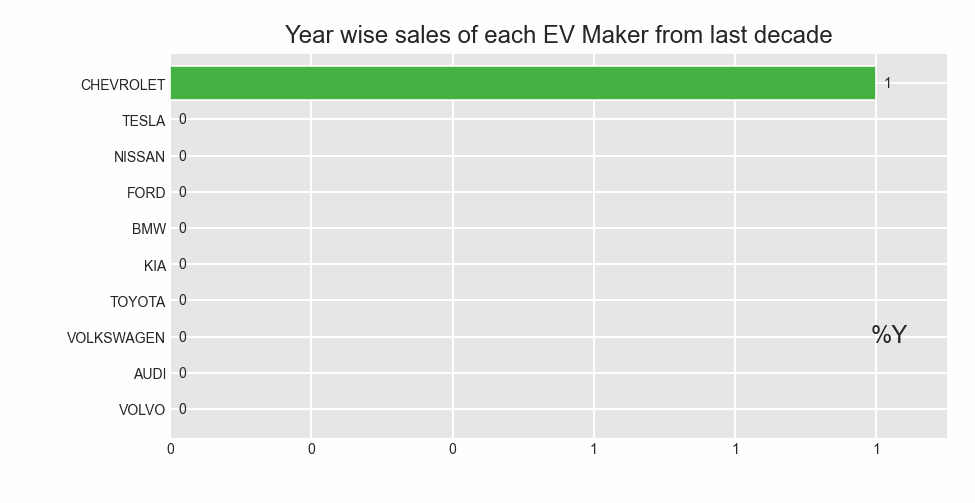

In [28]:
bcr.bar_chart_race(
    # must be a DataFrame where each row represents a single period of time.
    df=final,


    # name of the output video file
    filename="final.mp4",


    # specify location of image folder
    #img_label_folder="bar_image_labels",


    # change the Figure properties
    fig_kwargs={
        'figsize': (26, 15),
        'dpi': 120,
        'facecolor': '#F8FAFF'
    },


    # orientation of the bar: h or v
    orientation="h",


    # sort the bar for each period
    sort="desc",


    # number of bars to display in each frame
    n_bars=10,


    # to fix the maximum value of the axis
    # fixed_max=True,


    # smoothness of the animation
    steps_per_period=45,


    # time period in ms for each row
    period_length=3000,


    # custom set of colors
    colors=[
        '#6ECBCE', '#FF2243', '#FFC33D', '#CE9673', '#FFA0FF', '#6501E5', '#F79522', '#699AF8', '#34718E', '#00DBCD',
        '#00A3FF', '#F8A737', '#56BD5B', '#D40CE5', '#6936F9', '#FF317B', '#0000F3', '#FFA0A0', '#31FF83', '#0556F3'
    ],
    # title and its styles
    title={'label': 'Year wise sales of each Makers from last decade',
           'size': 52,
           'weight': 'bold',
           'pad': 40
           },


    # adjust the position and style of the period label
    period_label={'x': .95, 'y': .15,
                  'ha': 'right',
                  'va': 'center',
                  'size': 72,
                  'weight': 'semibold'
                  },


    # style the bar label text
    bar_label_font={'size': 27},


    # style the labels in x and y axis
    tick_label_font={'size': 27},


    # adjust the style of bar
    # alpha is opacity of bar
    # ls - width of edge
    bar_kwargs={'alpha': .99, 'lw': 0},


    # adjust the bar label format
    bar_texttemplate='{x:.2f}',


    # adjust the period label format
    period_template='{x:.0f}',
)

# Display the GIF
display(Image(filename="ev_racing_bar_chart.gif"))

# Conclusions from the Analysis:

🔋 Electric Range Distribution: The analysis of electric ranges shows most vehicles fall within a typical range, with a few outliers having very high or low ranges. This may indicate a standardization of battery capacities in the market.

🏙️ Legislative Districts: The spread of vehicles across various legislative districts suggests areas where infrastructure for electric vehicles (like charging stations) might need to be improved or is already well-established.

🌍 Geographic Distribution: The concentration of electric vehicles in certain locations suggests that adoption rates are higher in some cities/states, potentially influenced by government incentives 💰 or the availability of charging infrastructure ⚡.

# Overall Conclusion:

This analysis highlights key trends in the adoption of electric vehicles, both geographically 🌍 and in terms of performance 🔋 (electric range). The visualizations, particularly the bar chart race 🏁, provide a dynamic view of how manufacturers are competing over time, while the histograms 📊 give a deeper understanding of the data distribution.

📈 This information can be used by policymakers and manufacturers to target areas for improvement, such as increasing the electric vehicle range or expanding infrastructure in underserved locations ⚡🚗.